In [1]:
import pandas as pd

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

from sympy import *

from dateutil.parser import parse

# The Proposal

In Governor Sam Brownback's budget proposal, he says he wants to see 150 full time school counselors and psychologists hired each year [(page 8)](http://budget.ks.gov/publications/FY2019/Director_Overview--FY2019--1-10-2018.pdf)

The American School Counselor Association recommends a ratio of 250-to-1 for stduents to school counselors. The latest data available is for 2014-2015.

Based on their latest [report](https://www.schoolcounselor.org/asca/media/asca/home/Ratios14-15.pdf), Kansas' ratio is 473, nearly double their recommendation. The report says there were 497,275 students to 1,051 counselors. 

Let's double check that nuber quickly.

In [2]:
students_15 = 497275
counselors_15 = 1051
ratio_15 = students_15/counselors_15
print(ratio_15)
if round(ratio_15) == 473:
    print ("It checks out!")
else:
    print ("It doesn't check out!")

473.14462416745954
It checks out!


# Graphing The Proposed Increase

150 new hires a year sounds like a lot -- especially considering there are only 1,051 counselors in 2015, according to the American School Counselor Association.

Let's create a line graph to see what that would look like.

We do have a few assumptions to make first.

## How many of the 150 counselors are psychologists?
Unfortunately, Brownback says he wants 150 counselors AND psychologists. These are two different professions, so we can't just add an extra 150 counselors every year. 

So, we need to determine how many of those 150 should be counselors.

I'm going to assume the state will hire counselors and psychologists based on the recommended ratio from each respective professional organization.

For counselors, that's the American School Counselor Association. For school psychologists, that's the National Association of School Psychologists. They recommend between 500 and 700 students per psychologist. I'm going to take the middle number and call is 600. 


In [3]:
counselor_ratio = 1/250
psychologist_ratio = 1/600

### Now for some math

The problem again: how many of the 150 hires should be psychologists and how many should be counselors?

To do this, we need some algebra. 

#### x \* counselor_ratio + x \* psychologist_ratio = 150

Once we've solved for x:

#### x * counselor_ratio = number of hires

The python code below will execute this. 

In [4]:
x = Symbol('x')

variable = solveset(Eq(x*counselor_ratio+x*psychologist_ratio, 150),x)
variable = next(iter(variable))
number_of_counselors = round(counselor_ratio*variable)
number_of_counselors

106

We still have to make a few more assumptions.

I'm taking my data from [KSDE's data central](http://datacentral.ksde.org/report_gen.aspx). In this report, I looked at public schools and the "certified personnel by personnel type." I took the number of counselors for each school year and I created a csv file called "ksde_staff_numbers.csv." 

I'll be adding a line to my graph for how many counselors the state needs to hit the 250 ratio. For this, I'll be using the enrollment number from the KSDE. Note that it does have slightly different enrollment numbers than American School Council Association provided in this (graph)[https://www.schoolcounselor.org/asca/media/asca/home/Ratios14-15.pdf].

I'm working under the assumption enrollment growth will remain flat from now until 2023. There is likely to be some change, but not enough to really affect the ratio. I'm basing this assumption on this [Kansas Association of School Board report](https://kasb.org/wp-content/uploads/2016/12/2017_KASB_Enrollment_Projection_Report.pdf).

In [5]:
ksde_headcount_2017 = 489795

I'll be making a projected line based on Kansas adding 106 school counselors each year and not losing any.

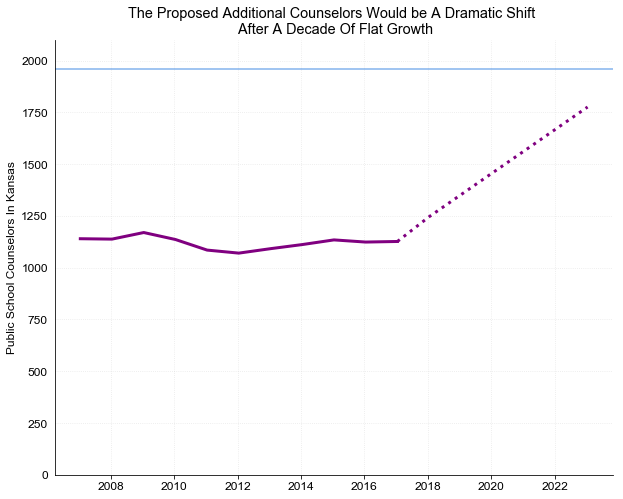

In [6]:
number_of_psychologists = round(psychologist_ratio*variable)


def project_counselors(year):
    return ((year - 2017)*number_of_counselors) + staff["counselors"][0]
def project_psychologists(year):
    return ((year - 2017)*number_of_psychologists) + staff["psychologists"][0]


staff = pd.read_csv("ksde_staff_numbers.csv")


append_dicts = [
    {
        "year":2018,
        "counselors":project_counselors(2018),
        "psychologists":project_psychologists(2018),
    },
    {
        "year":2019,
        "counselors":project_counselors(2019),
        "psychologists":project_psychologists(2019),
    },
    {
        "year":2020,
        "counselors":project_counselors(2020),
        "psychologists":project_psychologists(2020),
    },
    {
        "year":2021,
        "counselors":project_counselors(2021),
        "psychologists":project_psychologists(2021),
    },
    {
        "year":2022,
        "counselors":project_counselors(2022),
        "psychologists":project_psychologists(2022),
    },
    {
        "year":2023,
        "counselors":project_counselors(2023),
        "psychologists":project_psychologists(2023),
    },


]

staff = pd.read_csv("ksde_staff_numbers.csv")
staff = staff.append(append_dicts)
staff
staff["datetime"] = staff["year"].apply(str).apply(parse)
staff = staff.set_index("datetime")

ksde_headcount_2017 = 489795
idea_ratio_employment = ksde_headcount_2017/250





matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams.update({'font.size': 12})


fig, ax = plt.subplots(figsize=[10,8])

staff_past = staff[staff["year"]<=2017]
staff_projected = staff[staff["year"]>=2017]

ax.set_ylabel("Public School Counselors In Kansas")

ax.plot(staff_past.index,staff_past["counselors"],color="purple",linewidth=3)
ax.plot(staff_projected.index,staff_projected["counselors"],color="purple",linewidth=3,linestyle=':')

ax.set_ylim(0,2100)
#ax1.legend(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.grid(which='major', linestyle=':',alpha=.3)
ax.set_title("")

ax.axhline(y=idea_ratio_employment, xmin=0,xmax=1, color="#307FE2",alpha=.6)
#ayvline(x=84.1, ymin=0, ymax=1,color="black",alpha=.6)

ax.set_title("The Proposed Additional Counselors Would be A Dramatic Shift \n After A Decade Of Flat Growth")




#fmt = '${x:.0f}'
#tick = mtick.StrMethodFormatter(fmt)
#ax.yaxis.set_major_formatter(tick)
ax.tick_params(which='both', # Options for both major and minor ticks
            top='off', # turn off top ticks
            left='off', # turn off left ticks
            right='off',  # turn off right ticks
            bottom='on') # turn off bottom ticks


plt.savefig("Graph1v1.pdf",transparent=True)

### Footnotes
Note: The dotted line represents an additional 106 counselors a year. That number is based on the ratios recommended by the American School Counselor Association and the National Association of School Psychologists. For more details, [click here](https://github.com/Bisaha/Brownback-School-Counselors/blob/master/Brownback%20School%20Counselor%20Proposal.ipynb).

The blue line represents how many school counselors Kansas needs to have the 250:1 student-counselor ratio recommended by the American School Counselor Association, assuming the number of students remains flat. 

Source: Kansas State Department of Education

# Graphic: 2014-2015 Ratio
This graph is based on the [American School Counselor Association's Student-to-School-Counselor Ratio 2014-2015](https://www.schoolcounselor.org/asca/media/asca/home/Ratios14-15.pdf).

I used the program [Tabula](http://tabula.technology/) to extra the data from the PDF and created a clean csv called "tabula-Ratios14-15-cleaned.csv."



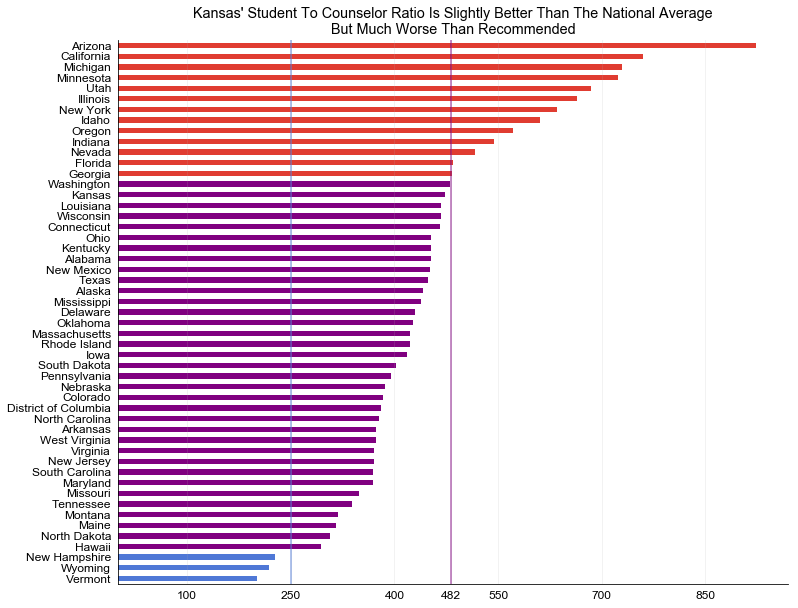

In [7]:
df = pd.read_csv("tabula-Ratios14-15-cleaned.csv")
df["ratio"] = round(df["students"]/df["counselors"],0).apply(int)
df = df.sort_values("ratio")
df = df.set_index("State")
df = df.drop("United States")

def get_colors(item):
    if item < 250:
        return '#4f78d6'
    elif item < 482:
        return "purple"
    else:
        return '#e03c31'
    
df["colors"] = df["ratio"].apply(get_colors)
        


matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams.update({'font.size': 12})

data = df["ratio"]
fig, ax = plt.subplots(figsize=(12,10))

#ax.bar(data)

#colors=['#4f78d6' if row.ratio < 250 elif "purple" if row.ratio < 482 else '#4f78d6' for name,row in df.iterrows()]
data.plot(kind="barh",ax=ax,color=df["colors"])


#data.plot(kind="barh",ax=ax,color=df['Colors'].apply(lambda x: colors[x]))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(which='major',axis="y", linestyle='-',alpha=0)

ax.grid(which='major',axis="x", linestyle='-',alpha=.2)


ax.set_title("Kansas' Student To Counselor Ratio Is Slightly Better Than The National Average\n But Much Worse Than Recommended ")
#fmt = '{x:.0f}%'
#tick = mtick.StrMethodFormatter(fmt)
#ax.xaxis.set_major_formatter(tick)
ax.tick_params(which='both', # Options for both major and minor ticks
            top='off', # turn off top ticks
            left='off', # turn off left ticks
            right='off',  # turn off right ticks
            bottom='off') # turn off bottom ticks
#ax.get_yaxis().set_visible(False)
ax.xaxis.set_ticks([100, 250, 400, 482, 550, 700, 850])
ax.axvline(x=250, ymin=0, ymax=1,color="#4f78d6",alpha=.6)
ax.axvline(x=482, ymin=0, ymax=1,color="purple",alpha=.6)

ax.set_ylabel("")

plt.savefig("graph2v1.pdf",transparent=True)

### Footnote
Note: The purple vertical line represents the ratio for the United States while the blue line represents the ratio recommended by the American School Counselor Association.

Source: American School Counselor Association